In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import empiricaldist as ed
import warnings
warnings.filterwarnings('ignore')

# Conjugate Priors

[0.04433029 0.09912548 0.15392066 0.20871584 0.26351103 0.31830621
 0.3731014  0.42789658 0.48269177 0.53748695 0.59228213 0.64707732
 0.7018725  0.75666769 0.81146287 0.86625805 0.92105324 0.97584842
 1.03064361 1.08543879 1.14023398 1.19502916 1.24982434 1.30461953
 1.35941471 1.4142099  1.46900508 1.52380026 1.57859545 1.63339063
 1.68818582 1.742981   1.79777619 1.85257137 1.90736655 1.96216174
 2.01695692 2.07175211 2.12654729 2.18134247 2.23613766 2.29093284
 2.34572803 2.40052321 2.4553184  2.51011358 2.56490876 2.61970395
 2.67449913 2.72929432 2.7840895  2.83888468 2.89367987 2.94847505
 3.00327024 3.05806542 3.1128606  3.16765579 3.22245097 3.27724616
 3.33204134 3.38683653 3.44163171 3.49642689 3.55122208 3.60601726
 3.66081245 3.71560763 3.77040281 3.825198   3.87999318 3.93478837
 3.98958355 4.04437874 4.09917392 4.1539691  4.20876429 4.26355947
 4.31835466 4.37314984 4.42794502 4.48274021 4.53753539 4.59233058
 4.64712576 4.70192095 4.75671613 4.81151131 4.8663065  4.9211

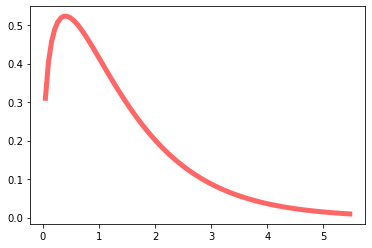

In [29]:
alpha = 1.4
dist=sp.stats.gamma(alpha)
x = np.linspace(dist.ppf(0.01),
                dist.ppf(0.99), 100)
print(x)
fig, ax = plt.subplots(1, 1)

ax.plot(x, dist.pdf(x),
       'r-', lw=5, alpha=0.6, label='gamma pdf')

In [107]:
sample = []
for i in range(0,1000):
    sample.append(dist.rvs())
    
sample=np.array(sample)

In [108]:
k = 4
pos_sample = []
for i in range(0,1000):
    likelihood = sp.stats.poisson.rvs(k)
    pos_sample.append(likelihood)
    
pos_sample=np.array(pos_sample)


In [66]:
likelihood

4

<AxesSubplot:ylabel='Density'>

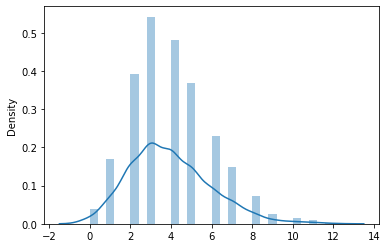

In [123]:
sns.distplot(pos_sample)

<AxesSubplot:ylabel='Density'>

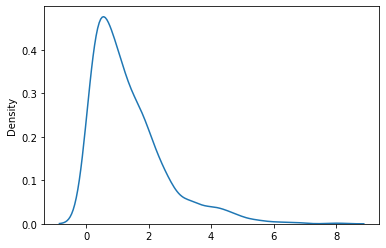

In [125]:
sns.distplot(sample, hist=False)

In [109]:
posterior = sample * pos_sample # prior * posterior

In [121]:
posterior
normalized_posterior=posterior/np.linalg.norm(posterior)

<AxesSubplot:ylabel='Density'>

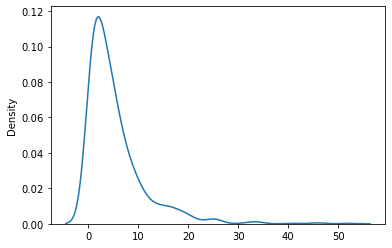

In [122]:
sns.distplot(posterior, hist=False)

In [131]:
uniform_prior=sp.stats.uniform.rvs(1000)
binomial_liklihood=sp.stats.binom(10,.8).rvs(1000)
posterior = uniform_prior*binomial_liklihood
normalized_posterior=posterior/np.linalg.norm(posterior)

<AxesSubplot:ylabel='Density'>

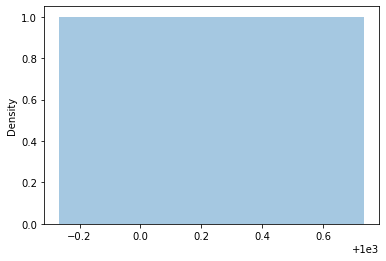

In [129]:
sns.distplot(uniform_prior)

<AxesSubplot:ylabel='Density'>

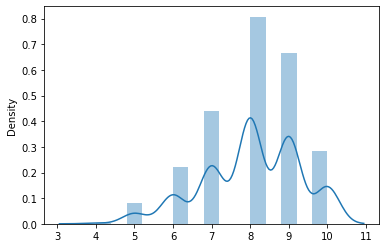

In [132]:
sns.distplot(binomial_liklihood)

<AxesSubplot:ylabel='Density'>

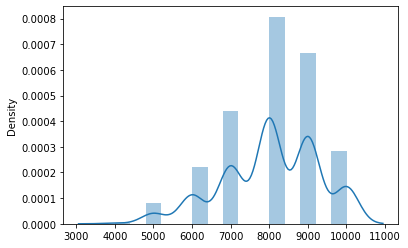

In [133]:
sns.distplot(posterior)

<AxesSubplot:ylabel='Density'>

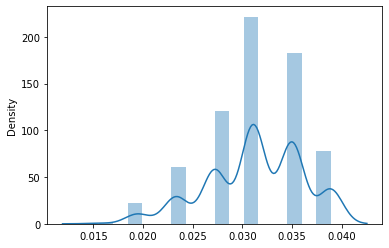

In [134]:
sns.distplot(normalized_posterior)

In [237]:
import scipy.stats

def make_beta(a, b):
    """Makes a beta object."""
    dist = scipy.stats.beta(a, b)
    dist.a = a
    dist.b = b
    return dist

alpha = 1
beta = 1

prior_beta = make_beta(alpha, beta)

def update_beta(prior, data):
    """Update a beta distribution."""
    k, n = data
    alpha = prior.a + k
    beta = prior.b + n - k
    return make_beta(a, b)

data = 140, 250
posterior_beta = update_beta(prior_beta, data)

NameError: name 'a' is not defined

<AxesSubplot:ylabel='Density'>

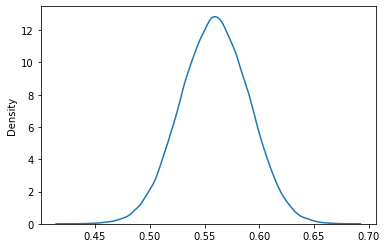

In [140]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

sns.distplot(posterior_beta.rvs(100000), hist=False)

<AxesSubplot:ylabel='Density'>

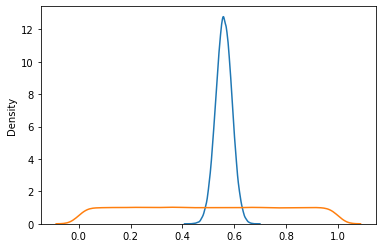

In [144]:
fig, ax = plt.subplots()
sns.distplot(posterior_beta.rvs(100000), hist=False, ax=ax)
sns.distplot(prior_beta.rvs(100000),hist=False, ax=ax)

In [145]:
data = 145, 255
posterior_beta1 = update_beta(posterior_beta, data)

<AxesSubplot:ylabel='Density'>

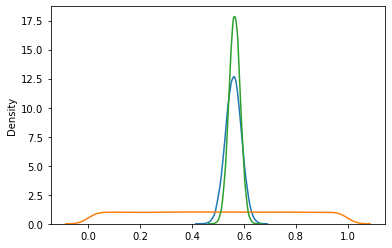

In [146]:
fig, ax = plt.subplots()
sns.distplot(posterior_beta.rvs(100000), hist=False, ax=ax)
sns.distplot(prior_beta.rvs(100000),hist=False, ax=ax)
sns.distplot(posterior_beta1.rvs(100000),hist=False, ax=ax)


In [161]:
# sample
samples = 20
binom_sample = []
for i in range(0,samples):
    sample = sp.stats.binom(1, .7)
    binom_sample.append(sample.rvs(10))
    
binom_sample=np.squeeze(binom_sample)

In [162]:
binom_sample

array([[1, 1, 1, 1, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 1, 1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0]])

In [186]:
alpha = 1
beta = 1
# k successes, np.sum(b)
# n trials
prior_beta = make_beta(alpha, beta)
beta_dists = []
for i in binom_sample:
    beta_dists.append(prior_beta.rvs(5000))
    data = np.sum(i), len(i)
    posterior_beta = update_beta(prior_beta, data)
    prior_beta = posterior_beta
    

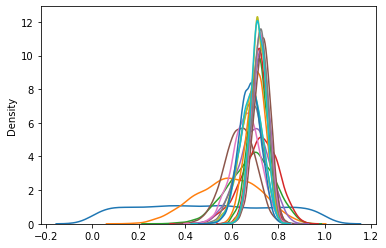

In [187]:
fig, ax = plt.subplots()

for i in beta_dists:
    sns.distplot(i, hist=False, ax=ax)

In [181]:
# sample
samples = 20
geo_sample = []
for i in range(0,samples):
    sample = sp.stats.geom(p=.6)
    geo_sample.append(sample.rvs(10))
    
geo_sample=np.squeeze(geo_sample)

In [183]:
geo_sample

array([[1, 4, 4, 2, 2, 1, 1, 2, 1, 1],
       [1, 1, 1, 1, 2, 1, 1, 2, 1, 1],
       [1, 1, 1, 2, 2, 1, 2, 1, 1, 2],
       [3, 3, 1, 3, 4, 2, 2, 1, 1, 2],
       [1, 1, 1, 1, 1, 1, 5, 2, 2, 1],
       [3, 1, 1, 1, 1, 2, 1, 5, 2, 1],
       [1, 1, 2, 1, 3, 1, 1, 1, 1, 3],
       [1, 4, 1, 2, 3, 1, 1, 3, 2, 1],
       [1, 1, 1, 1, 2, 2, 2, 1, 1, 1],
       [1, 1, 1, 1, 1, 2, 2, 1, 3, 1],
       [1, 1, 1, 4, 1, 5, 3, 1, 1, 1],
       [1, 3, 1, 1, 5, 2, 3, 1, 1, 1],
       [1, 1, 1, 1, 1, 2, 8, 1, 1, 1],
       [3, 1, 1, 1, 1, 1, 1, 4, 4, 1],
       [1, 1, 1, 2, 1, 2, 1, 1, 1, 2],
       [2, 1, 3, 1, 1, 1, 1, 1, 1, 2],
       [2, 1, 2, 1, 1, 1, 2, 3, 2, 2],
       [2, 4, 2, 1, 1, 2, 3, 1, 2, 1],
       [2, 1, 1, 1, 1, 2, 2, 1, 1, 1],
       [3, 2, 1, 2, 1, 1, 2, 1, 5, 2]])

In [188]:
alpha = 1
beta = 1
# k successes, np.sum(b)
# n trials
prior_beta = make_beta(alpha, beta)
beta_dists = []
for i in geo_sample:
    beta_dists.append(prior_beta.rvs(5000))
    data = len(i), np.sum(i)
    posterior_beta = update_beta(prior_beta, data)
    prior_beta = posterior_beta
    

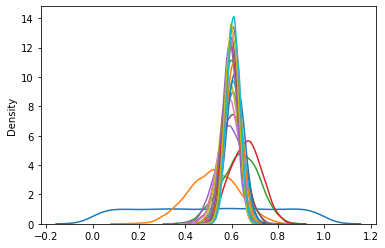

In [189]:
fig, ax = plt.subplots()

for i in beta_dists:
    sns.distplot(i, hist=False, ax=ax)

In [ ]:
# another map example

In [ ]:
https://notebook.community/unpingco/Python-for-Probability-Statistics-and-Machine-Learning/chapters/statistics/notebooks/maximum_posteriori
    https://en.wikipedia.org/wiki/Beta_distribution
        https://agustinus.kristia.de/techblog/2017/01/01/mle-vs-map/

In [ ]:
Stanford slides MAP example: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/ppt/22-MAP.pdf

In [259]:
bern=sp.stats.bernoulli(p=.6)

(array([36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 64.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

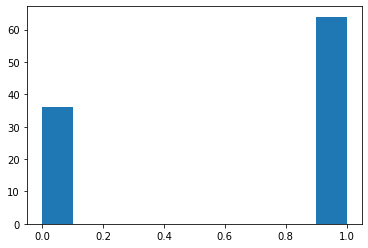

In [282]:
# single sample 
plt.hist(bern.rvs(100))

In [ ]:
# model theta with 2 different priors both beta, both different starting points

In [286]:
b38=sp.stats.beta(a=3,b=8)
b74=sp.stats.beta(a=7,b=4)

<AxesSubplot:ylabel='Density'>

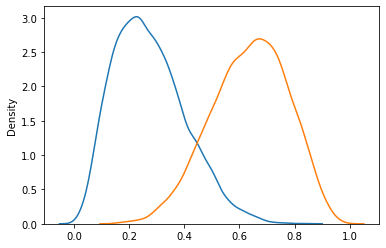

In [287]:
sns.distplot(b38.rvs(10000), hist=False)
sns.distplot(b74.rvs(10000), hist=False)

In [288]:
#a-1= number of successes
#b-1 number of failures

def update_dist(bern_sample, beta):
    a=np.sum(bern_sample)+1
    b=(len(bern_sample)-np.sum(bern_sample))+1
    a=beta.a + a
    b=beta.a + b
    return sp.stats.beta(a, b)


In [289]:
sample=bern.rvs(2)

In [292]:
sample

array([0, 1])

In [290]:
b38=update_dist(sample,b38)
b74=update_dist(sample,b74)

<AxesSubplot:ylabel='Density'>

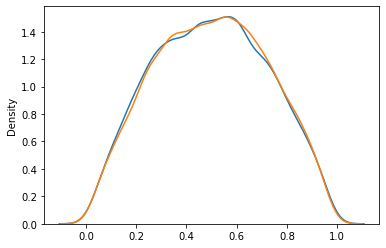

In [291]:
sns.distplot(b38.rvs(10000), hist=False)
sns.distplot(b74.rvs(10000), hist=False)

<AxesSubplot:ylabel='Density'>

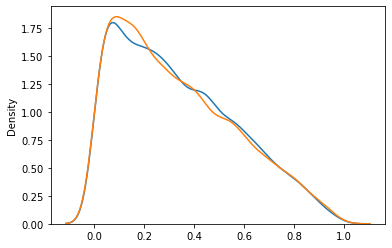

In [294]:
sample=bern.rvs(1)
b38=update_dist(sample,b38)
b74=update_dist(sample,b74)
sns.distplot(b38.rvs(10000), hist=False)
sns.distplot(b74.rvs(10000), hist=False)

<AxesSubplot:ylabel='Density'>

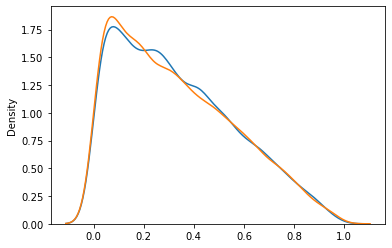

In [298]:
sample=bern.rvs(1)
b38=update_dist(sample,b38)
b74=update_dist(sample,b74)
sns.distplot(b38.rvs(10000), hist=False)
sns.distplot(b74.rvs(10000), hist=False)

<AxesSubplot:ylabel='Density'>

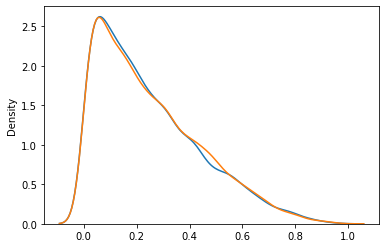

In [270]:
sample=bern.rvs(2)
b38=update_dist(sample,b38)
b74=update_dist(sample,b74)
sns.distplot(b38.rvs(10000), hist=False)
sns.distplot(b74.rvs(10000), hist=False)

<AxesSubplot:ylabel='Density'>

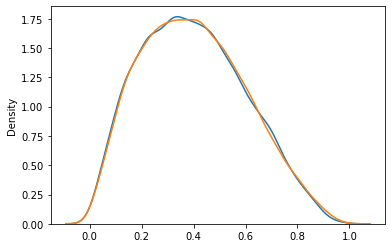

In [271]:
    sample=bern.rvs(3)
b38=update_dist(sample,b38)
b74=update_dist(sample,b74)
sns.distplot(b38.rvs(10000), hist=False)
sns.distplot(b74.rvs(10000), hist=False)

[0 1 1 0]
[0 0 1 0]


<AxesSubplot:ylabel='Density'>

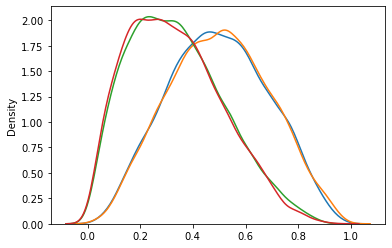

In [304]:
sample=bern.rvs(4)
print(sample)
b38=update_dist(sample,b38)
b74=update_dist(sample,b74)
sns.distplot(b38.rvs(10000), hist=False)
sns.distplot(b74.rvs(10000), hist=False)
sample=bern.rvs(4)
print(sample)
b38=update_dist(sample,b38)
b74=update_dist(sample,b74)
sns.distplot(b38.rvs(10000), hist=False)
sns.distplot(b74.rvs(10000), hist=False)

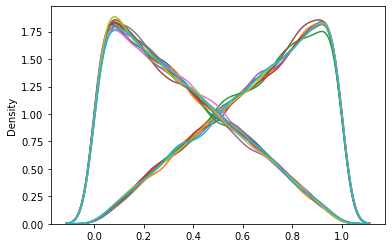

In [273]:
num_expt=10
b38=sp.stats.beta(a=3,b=8)
b74=sp.stats.beta(a=7,b=4)

for i in range(0,num_expt):
    sample=bern.rvs(1)
    b38=update_dist(sample,b38)
    b74=update_dist(sample,b74)
    sns.distplot(b38.rvs(10000), hist=False)
    sns.distplot(b74.rvs(10000), hist=False)

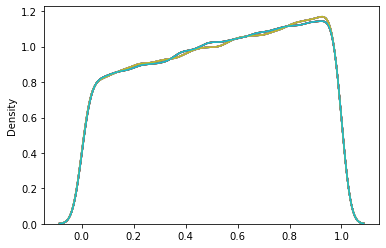

In [276]:
num_expt=10
b38=sp.stats.beta(a=3,b=8)
b74=sp.stats.beta(a=7,b=4)
beta1=[]
beta2=[]
for i in range(0,num_expt):
    sample=bern.rvs(1)
    b38=update_dist(sample,b38)
    b74=update_dist(sample,b74)
    beta1.append(b38.rvs(10000))
    beta2.append(b74.rvs(10000))

for i in range(0,len(beta1)):
    sns.distplot(beta1, hist=False)
    sns.distplot(beta2, hist=False)

<AxesSubplot:ylabel='Density'>

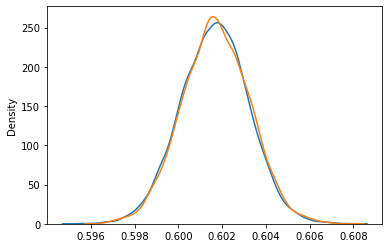

In [269]:
sample=bern.rvs(100000)
b38=update_dist(sample,b38)
b74=update_dist(sample,b74)
sns.distplot(b38.rvs(10000), hist=False)
sns.distplot(b74.rvs(10000), hist=False)

# Coin Flip Example Basics of MLE and MAP

In [ ]:
# not a fair coin, how can we estimate such a probability

In [3]:
n = 100
theta = .7
flips = np.random.choice([0,1], p=[1-theta,theta], size=n)

In [4]:
# theta hat is
np.mean(flips)

0.67

In [ ]:
# MLE states that our best guess for theta is based on observations
# specifically we should maximize the loglikelihood function of theta

In [23]:
inputs = flips
bern = (theta**inputs)*(1-inputs)**(1-inputs)
log_likelihood = inputs*np.log2(theta)+(1-inputs)*np.log2(1-theta)


d_param_pos = inputs[0]-inputs[4]

derivative_log_likelihood = np.gradient(log_likelihood, d_param_pos)
derivative_log_likelihood = ((inputs)/theta) - (((len(flips) - (inputs))/1-theta))

In [22]:
derivative_log_likelihood

63.414285714285725

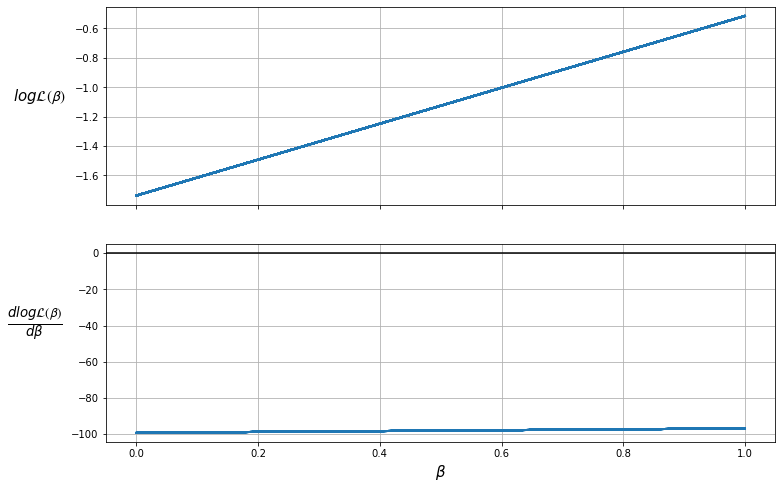

In [24]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

ax1.plot(inputs, log_likelihood, lw=2)
ax2.plot(inputs, derivative_log_likelihood, lw=2)

ax1.set_ylabel(r'$log \mathcal{L(\beta)}$',
               rotation=0,
               labelpad=35,
               fontsize=15)
ax2.set_ylabel(r'$\frac{dlog \mathcal{L(\beta)}}{d \beta}$ ',
               rotation=0,
               labelpad=35,
               fontsize=19)
ax2.set_xlabel(r'$\beta$', fontsize=15)
ax1.grid(), ax2.grid()
plt.axhline(c='black')
plt.show()

C:\Users\Connor Mignone\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

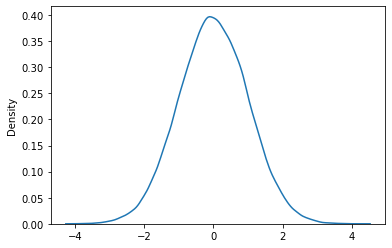

In [48]:
samples = np.random.normal(0,1,100000)
sns.distplot(samples, hist=False)

In [ ]:
n = 10
theta = 0.7
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=10)
X_arr

# MAP

In [62]:
n=50
X_arr = np.ones(n)
X_arr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [71]:
n = 50
X_arr = np.ones(n)
print(X_arr)
alpha = beta = 2
theta = 0.7
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
print(sum(X_arr) /  X_arr.size)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
0.66


In [80]:
alpha = beta = 2
theta = 0.7
n = 50
X_arr = np.random.choice([0, 1], p=[1-theta, theta], size=n)
sum(X_arr) /  X_arr.size

0.72

In [81]:
beta_arr = np.asarray([[alpha+sum(X_arr[:i+1]), beta+(i+1-sum(X_arr[:i+1]))] for i in range(X_arr.size)])
print(beta_arr.shape)
print(beta_arr)
beta_arr = np.insert(beta_arr, 0, [alpha, beta], 0)
print(beta_arr)

(50, 2)
[[ 2  3]
 [ 3  3]
 [ 4  3]
 [ 5  3]
 [ 6  3]
 [ 7  3]
 [ 8  3]
 [ 9  3]
 [10  3]
 [10  4]
 [10  5]
 [11  5]
 [12  5]
 [13  5]
 [13  6]
 [14  6]
 [15  6]
 [15  7]
 [15  8]
 [15  9]
 [16  9]
 [17  9]
 [18  9]
 [18 10]
 [19 10]
 [19 11]
 [20 11]
 [21 11]
 [21 12]
 [21 13]
 [22 13]
 [23 13]
 [23 14]
 [24 14]
 [25 14]
 [26 14]
 [27 14]
 [28 14]
 [28 15]
 [29 15]
 [30 15]
 [31 15]
 [32 15]
 [33 15]
 [33 16]
 [34 16]
 [35 16]
 [36 16]
 [37 16]
 [38 16]]
[[ 2  2]
 [ 2  3]
 [ 3  3]
 [ 4  3]
 [ 5  3]
 [ 6  3]
 [ 7  3]
 [ 8  3]
 [ 9  3]
 [10  3]
 [10  4]
 [10  5]
 [11  5]
 [12  5]
 [13  5]
 [13  6]
 [14  6]
 [15  6]
 [15  7]
 [15  8]
 [15  9]
 [16  9]
 [17  9]
 [18  9]
 [18 10]
 [19 10]
 [19 11]
 [20 11]
 [21 11]
 [21 12]
 [21 13]
 [22 13]
 [23 13]
 [23 14]
 [24 14]
 [25 14]
 [26 14]
 [27 14]
 [28 14]
 [28 15]
 [29 15]
 [30 15]
 [31 15]
 [32 15]
 [33 15]
 [33 16]
 [34 16]
 [35 16]
 [36 16]
 [37 16]
 [38 16]]


In [82]:
beta_X = np.linspace(0, 1, 1000)


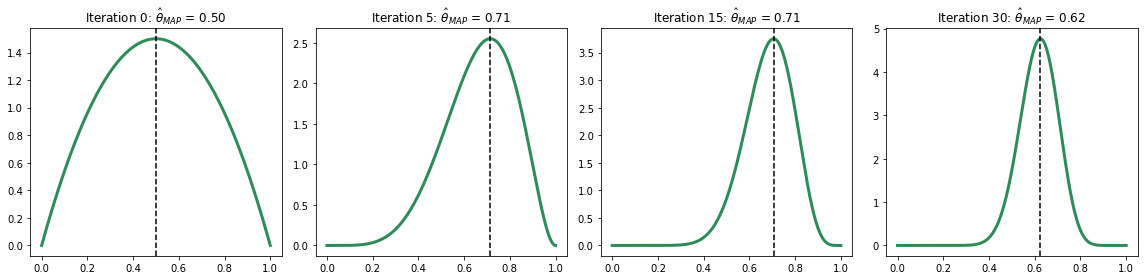

In [83]:
my_color = '#2E8B57'
fig, ax_arr = plt.subplots(ncols=4, figsize=(16,4), sharex=True)
for i, iter_ in enumerate([0, 5, 15, 30]):
    ax = ax_arr[i]
    a, b = beta_arr[iter_]
    beta_Y = sp.stats.beta.pdf(x=beta_X, a=a, b=b)
    ax.plot(beta_X, beta_Y, color=my_color, linewidth=3)
    if a > 1 and b > 1:
        mode = (a-1)/(a+b-2)
    else:
        mode = a/(a+b)
    ax.axvline(x=mode, linestyle='--', color='k')
    ax.set_title('Iteration %d: $\hat{\\theta}_{MAP}$ = %.2f'%(iter_, mode))
fig.tight_layout()

# MLE

In [86]:
def flip_coin(flips, theta):
    return np.array(np.random.binomial(1,theta,flips))
    
flip_coin(1000,.1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [90]:
def MLE_estimate(sample):
    return np.mean(sample)

def sequential_MLE_estimate(sample):
    iteration_estimate = []
    total_heads = 0
    total_tails = 0
    for i in range(len(sample)):
        if sample[i] == 1:
            total_heads += 1
        else:
            total_tails += 1
        MLE_estimate = total_heads/(total_heads+total_tails)
        iteration_estimate.append(MLE_estimate)
    return np.array(iteration_estimate)
            

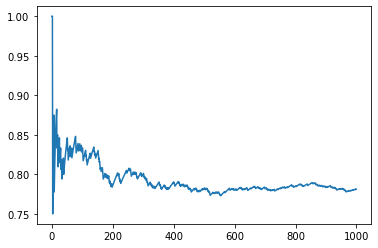

In [92]:
sample=flip_coin(1000,.8)
iteration_estimate=sequential_MLE_estimate(sample)
plt.plot(range(len(iteration_estimate)), iteration_estimate)

C:\Users\Connor Mignone\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

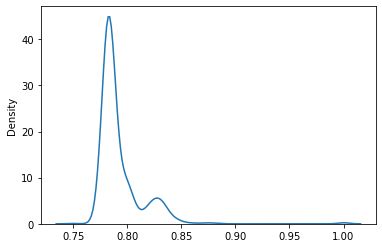

In [106]:
sns.distplot(iteration_estimate, hist=False)

In [119]:
def prior_belief(heads,tails):
    heads=np.ones(heads)
    tails=np.zeros(tails)
    prior=np.concatenate((heads,tails), axis=None)
    return np.mean(prior)

def MAP_estimate(sample, prior, heads, tails):
    sample_mean=np.mean(sample)
    sample_len=len(sample)
    prior_len=heads+tails
    total_len=sample_len+prior_len
    estimate=(sample_mean*(sample_len/total_len))+(prior*(prior_len/total_len))
    return(estimate)
    
def sequential_map_estimates(sample, prior_heads,prior_tails):
    iteration_estimate=[]
    total_heads=0
    total_tails=0
    for i in range(len(sample)):
        if sample[i]==1:
            total_heads+=1
        else:
            total_tails+=1
        iteration_mean = total_heads/(total_heads+total_tails)
        iteration_len = i
        prior=prior_belief(prior_heads,prior_tails)
        prior_len=prior_heads+prior_tails
        total_len=iteration_len+prior_len
        MAP_estimate=(iteration_mean*(iteration_len/total_len))+(prior*(prior_len/total_len))
        iteration_estimate.append(MAP_estimate)
    return iteration_estimate

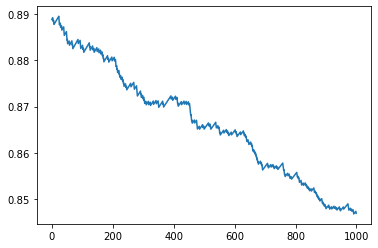

In [121]:
sample=flip_coin(1000,.8)
iteration_estimate=sequential_map_estimates(sample,800,100)
plt.plot(range(len(iteration_estimate)), iteration_estimate)

C:\Users\Connor Mignone\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

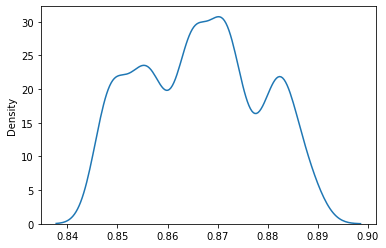

In [122]:
sns.distplot(iteration_estimate, hist=False)

# Both on same graph

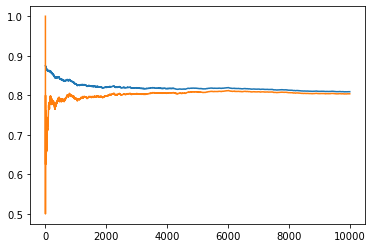

In [125]:
sample=flip_coin(10000,.8)
iteration_estimate_mle=sequential_MLE_estimate(sample)
iteration_estimate_map=sequential_map_estimates(sample,700,100)
plt.plot(range(len(iteration_estimate_map)), iteration_estimate_map)
plt.plot(range(len(iteration_estimate_map)),iteration_estimate_mle)

C:\Users\Connor Mignone\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Connor Mignone\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.7, 0.9)

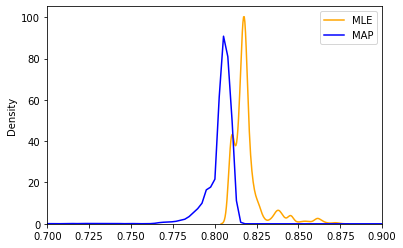

In [134]:
sns.distplot(iteration_estimate_map, hist=False, color='orange')
sns.distplot(iteration_estimate_mle, hist=False, color='blue')
plt.legend(labels=['MLE', 'MAP'])
plt.xlim(.7,.9)

## Simulation Chain

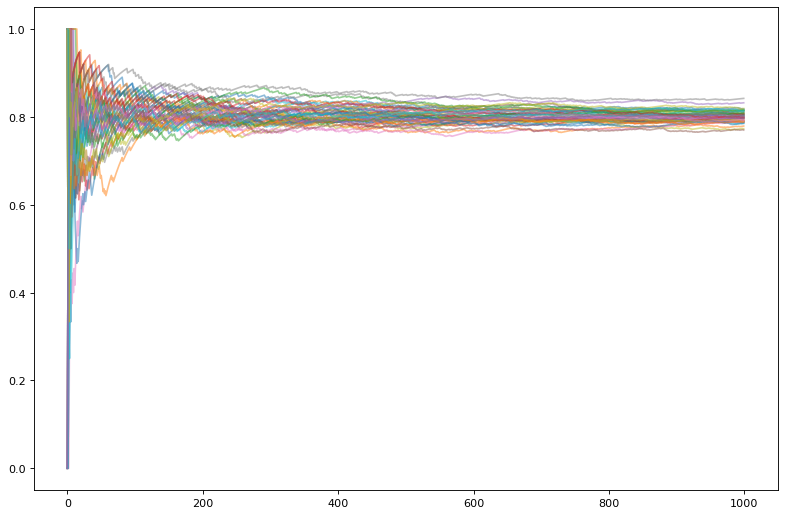

In [147]:
num_expt = 50
MLE_MC = []
for i in range(num_expt):
    sample=flip_coin(1000,.8)
    iteration_estimate=sequential_MLE_estimate(sample)
    MLE_MC.append(iteration_estimate)
    
MLE_MC = np.array(MLE_MC)
MLE_MC.shape


from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

for i in range(len(MLE_MC)):
    plt.plot(range(len(MLE_MC[1])), MLE_MC[i], alpha=.5)

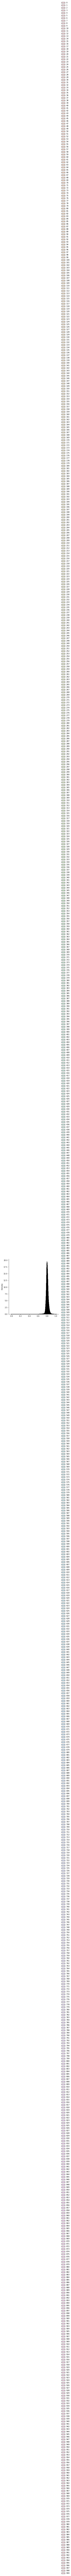

In [155]:
import warnings
warnings.filterwarnings('ignore')
#for i in range(len(MLE_MC)):
sns.displot(MLE_MC,kind='kde', alpha=.2, multiple='stack')

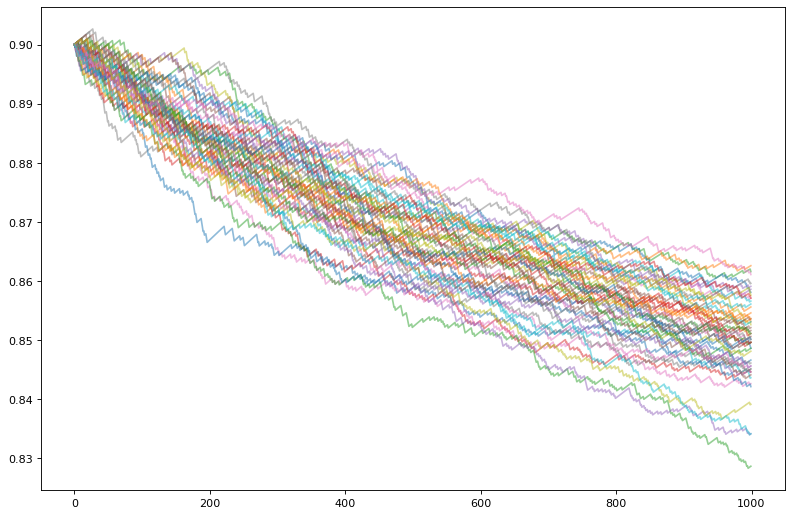

In [157]:
num_expt = 50
MAP_MC = []
for i in range(num_expt):
    sample=flip_coin(1000,.8)
    iteration_estimate=sequential_map_estimates(sample,900,100)
    MAP_MC.append(iteration_estimate)
    
MAP_MC = np.array(MAP_MC)
MAP_MC.shape


from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

for i in range(len(MAP_MC)):
    plt.plot(range(len(MAP_MC[1])), MAP_MC[i], alpha=.5)

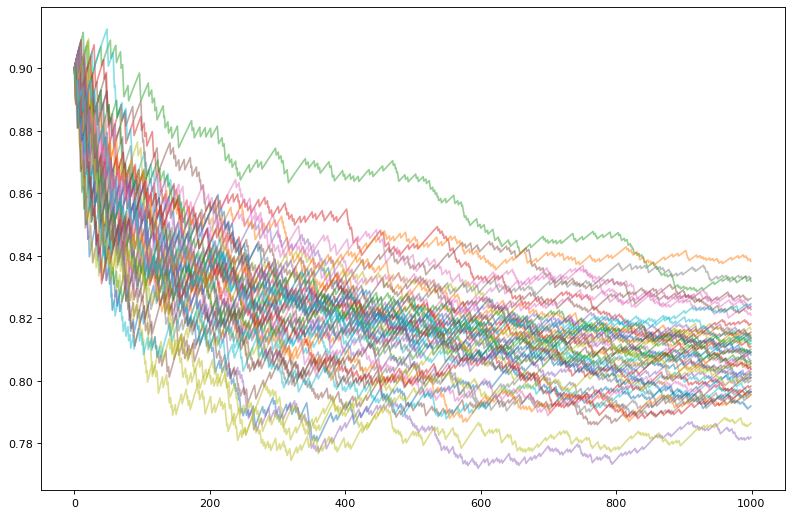

In [174]:
num_expt = 50
MAP_MC1 = []
for i in range(num_expt):
    sample=flip_coin(1000,.8)
    iteration_estimate=sequential_map_estimates(sample,90,10)
    MAP_MC1.append(iteration_estimate)
    
MAP_MC1 = np.array(MAP_MC1)
MAP_MC1.shape


from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

for i in range(len(MAP_MC1)):
    plt.plot(range(len(MAP_MC1[1])), MAP_MC1[i], alpha=.5)

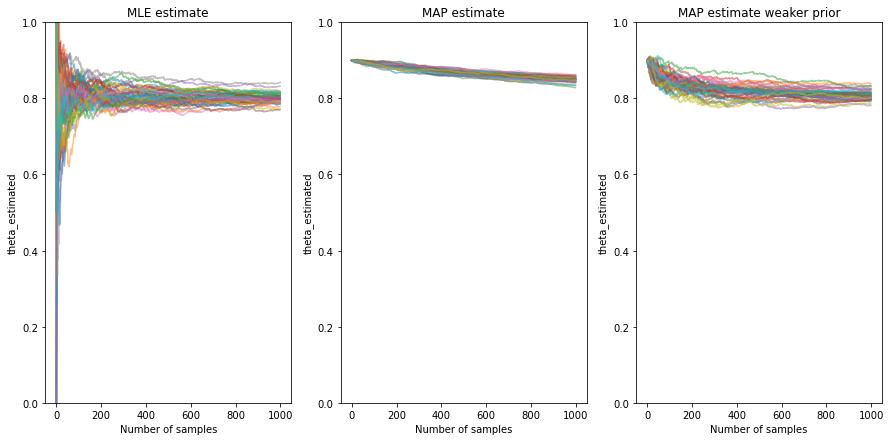

In [175]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,7))

ax1.set_title("MLE estimate")
ax1.set_ylim(0, 1)
ax1.set_xlabel("Number of samples")
ax1.set_ylabel("theta_estimated")
for i in range(len(MAP_MC)):
    ax1.plot(MLE_MC[i],alpha=.5)


ax2.set_title("MAP estimate")
ax2.set_ylim(0, 1)
ax2.set_xlabel("Number of samples")
ax2.set_ylabel("theta_estimated")
for i in range(len(MAP_MC)):
    ax2.plot(MAP_MC[i], alpha=.5)
    
ax3.set_title("MAP estimate weaker prior")
ax3.set_ylim(0, 1)
ax3.set_xlabel("Number of samples")
ax3.set_ylabel("theta_estimated")
for i in range(len(MAP_MC1)):
    ax3.plot(MAP_MC1[i], alpha=.5)
    
     

# MLE and MAP

https://python.quantecon.org/mle.html

In [98]:
df = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/mle/fp.dta?raw=true')
df.head()

,country,ccode,year,cyear,numbil,numbil0,numbilall,netw,netw0,netwall,...,gattwto08,mcapbdol,mcapbdol08,lnmcap08,topintaxnew,topint08,rintr,noyrs,roflaw,nrrents
0,United States,2.0,1990.0,21990.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3060.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
1,United States,2.0,1991.0,21991.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4090.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
2,United States,2.0,1992.0,21992.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4490.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
3,United States,2.0,1993.0,21993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5136.198730,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
4,United States,2.0,1994.0,21994.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5067.016113,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN


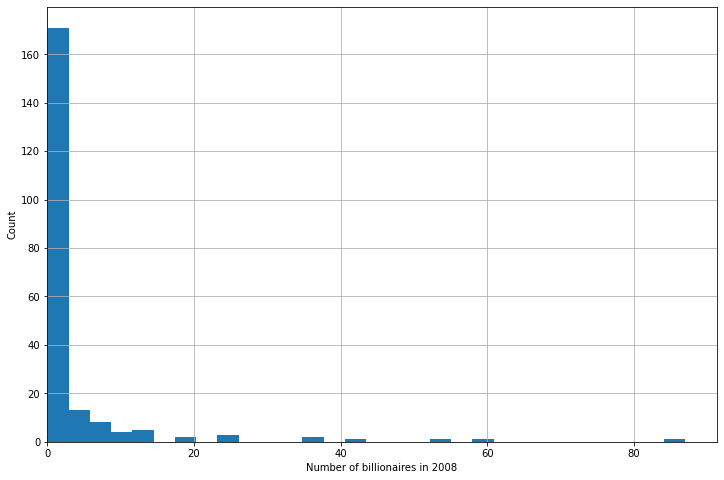

In [99]:
numbil0_2008 = df[(df['year'] == 2008) & (
    df['country'] != 'United States')].loc[:, 'numbil0']

plt.subplots(figsize=(12, 8))
plt.hist(numbil0_2008, bins=30)
plt.xlim(left=0)
plt.grid()
plt.xlabel('Number of billionaires in 2008')
plt.ylabel('Count')
plt.show()

In [85]:
def poisson_prob(y, lambdaa):
    return ((lambdaa**y) / np.math.factorial(y)) * np.exp(-lambdaa)

In [86]:
poisson_prob(5,5)

0.1754673697678507

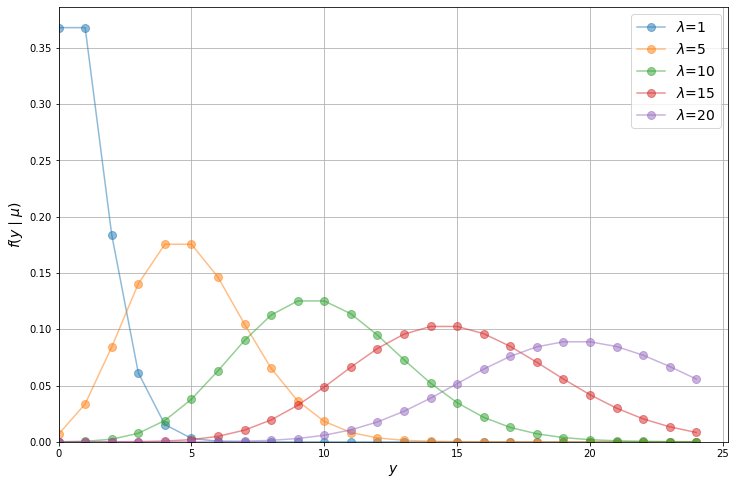

In [96]:

y_values = range(0, 25)

fig, ax = plt.subplots(figsize=(12, 8))

for lambdaa in [1, 5, 10, 15, 20]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_prob(y_i, lambdaa))
    ax.plot(y_values,
            distribution,
            label=f'$\lambda$={lambdaa}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.set_ylabel('$f(y \mid \mu)$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

In [88]:
y_n = 20
yi_values = np.arange(0, y_n, 1)
yi_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [89]:
X, Y = np.meshgrid(yi_values, yi_values)
X=np.array(X)


In [90]:
values=[]
for i in X:
    for j in i: 
        val=poisson_prob(j, 7)
        values.append(val)
    

In [91]:
y_n = 20
yi_values = np.arange(0, y_n, 1)

# Create coordinate points of X and Y
X, Y = np.meshgrid(yi_values, yi_values)

In [92]:
yi_values = np.arange(0, y_n, 1)

# Create coordinate points of X and Y
X, Y = np.meshgrid(yi_values, yi_values)
Z_x=[]
Z_y=[]
# Multiply distributions together
for i in X:
    row = []
    for j in i:
        row.append(poisson_prob(j, 7))
    Z_x.append(row)
    
for i in Y:
    row = []
    for j in i:
        row.append(poisson_prob(j, 7))
    Z_y.append(row)


Z_x=np.array(Z_x)
Z_y=np.array(Z_y)

Z = Z_x*Z_y

In [93]:
Z

array([[ 8.31528719e-07,  5.82070103e-06,  2.03724536e-05,
         4.75357251e-05,  8.31875189e-05,  1.16462527e-04,
         1.35872948e-04,  1.35872948e-04,  1.18888829e-04,
         9.24690893e-05,  6.47283625e-05,  4.11907762e-05,
         1.66024885e-06, -2.53081591e-07, -3.64132322e-09,
         1.03181521e-09, -6.06619804e-11, -4.89684942e-12,
        -2.30862573e-13,  3.02261818e-15],
       [ 5.82070103e-06,  4.07449072e-05,  1.42607175e-04,
         3.32750076e-04,  5.82312633e-04,  8.15237686e-04,
         9.51110633e-04,  9.51110633e-04,  8.32221804e-04,
         6.47283625e-04,  4.53098538e-04,  2.88335433e-04,
         1.16217419e-05, -1.77157113e-06, -2.54892626e-08,
         7.22270645e-09, -4.24633862e-10, -3.42779459e-11,
        -1.61603801e-12,  2.11583273e-14],
       [ 2.03724536e-05,  1.42607175e-04,  4.99125114e-04,
         1.16462527e-03,  2.03809421e-03,  2.85333190e-03,
         3.32888722e-03,  3.32888722e-03,  2.91277631e-03,
         2.26549269e-03,  1.5

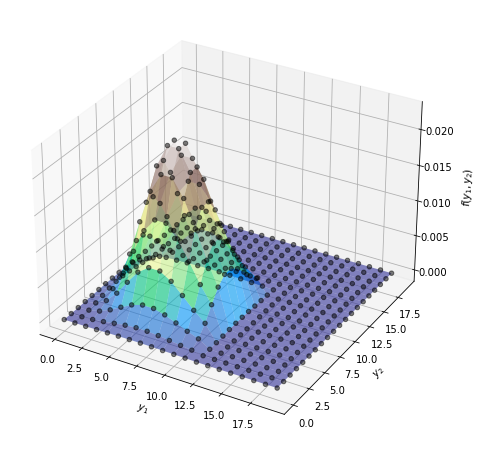

In [94]:

def plot_joint_poisson(lam=7, y_n=20):
    yi_values = np.arange(0, y_n, 1)

    # Create coordinate points of X and Y
    X, Y = np.meshgrid(yi_values, yi_values)
    Z_x=[]
    Z_y=[]
    # Multiply distributions together
    for i in X:
        row = []
        for j in i:
            row.append(poisson_prob(j, 7))
        Z_x.append(row)

    for i in Y:
        row = []
        for j in i:
            row.append(poisson_prob(j, 7))
        Z_y.append(row)
            
    Z_x=np.array(Z_x)
    Z_y=np.array(Z_y)
    Z=(Z_x*Z_y)
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='terrain', alpha=0.6)
    ax.scatter(X, Y, Z.T, color='black', alpha=0.5, linewidths=1)
    ax.set(xlabel='$y_1$', ylabel='$y_2$')
    ax.set_zlabel('$f(y_1, y_2)$', labelpad=10)
    plt.show()

plot_joint_poisson(lam=7, y_n=20)

In [ ]:
for i in data:
    f(y_i|X_i;B) *= poisson_prob()

# No Analytical Solution
Newton-Raphson algorithm

We need to find the maximum likelihood estimate of the parameter

In [95]:
param_possibility = np.linspace(1,20)

log_likelihood = -(param_possibility-10)**2 - 10

d_param_pos = param_possibility[1]-param_possibility[0]

derivative_log_likelihood = np.gradient(log_likelihood, d_param_pos)

print(derivative_log_likelihood) # computational derivative
print(-2 * param_possibility + 20) # theoretical derivative

[ 17.6122449   17.2244898   16.44897959  15.67346939  14.89795918
  14.12244898  13.34693878  12.57142857  11.79591837  11.02040816
  10.24489796   9.46938776   8.69387755   7.91836735   7.14285714
   6.36734694   5.59183673   4.81632653   4.04081633   3.26530612
   2.48979592   1.71428571   0.93877551   0.16326531  -0.6122449
  -1.3877551   -2.16326531  -2.93877551  -3.71428571  -4.48979592
  -5.26530612  -6.04081633  -6.81632653  -7.59183673  -8.36734694
  -9.14285714  -9.91836735 -10.69387755 -11.46938776 -12.24489796
 -13.02040816 -13.79591837 -14.57142857 -15.34693878 -16.12244898
 -16.89795918 -17.67346939 -18.44897959 -19.2244898  -19.6122449 ]
[ 18.          17.2244898   16.44897959  15.67346939  14.89795918
  14.12244898  13.34693878  12.57142857  11.79591837  11.02040816
  10.24489796   9.46938776   8.69387755   7.91836735   7.14285714
   6.36734694   5.59183673   4.81632653   4.04081633   3.26530612
   2.48979592   1.71428571   0.93877551   0.16326531  -0.6122449
  -1.387755

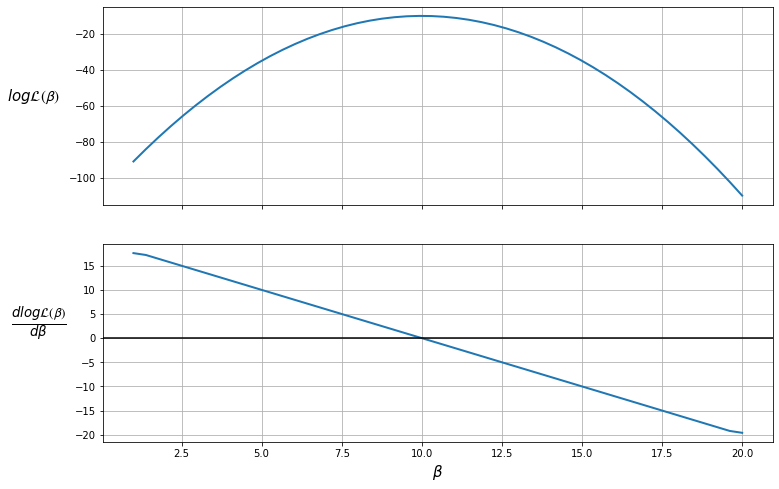

In [80]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

ax1.plot(param_possibility, log_likelihood, lw=2)
ax2.plot(param_possibility, derivative_log_likelihood, lw=2)

ax1.set_ylabel(r'$log \mathcal{L(\beta)}$',
               rotation=0,
               labelpad=35,
               fontsize=15)
ax2.set_ylabel(r'$\frac{dlog \mathcal{L(\beta)}}{d \beta}$ ',
               rotation=0,
               labelpad=35,
               fontsize=19)
ax2.set_xlabel(r'$\beta$', fontsize=15)
ax1.grid(), ax2.grid()
plt.axhline(c='black')
plt.show()

Where derivative of log likelihood is 0 should be the maximum of the log likelihood

We can take the second derivative to ensure this is not a local minimum, must be negative, as if the slope is slowing

In [ ]:
H(param_t) = second derivative of the loglikelihood of the params at time t
G(param_t) = first derivative of the loglikelihood of the params at time t

for i in algorithm:
    params_t+1 = param_t - H**-1(param_t)G(param_t)

In [81]:
def first_derivative(log_likelihood, param_possibility):
    param = param_possibility[1]-param_possibility[0]
    first_derivative = np.gradient(log_likelihood, param)
    return first_derivative

def second_derivative(first_derivative, param_possibility):
    param = param_possibility[1]-param_possibility[0]
    second_derivative = np.gradient(first_derivative,param)
    return second_derivative

In [83]:
dx = first_derivative(log_likelihood, param_possibility)
ddx = second_derivative(dx, param_possibility)

ddx

array([-1. , -1.5, -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
       -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
       -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
       -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. , -2. ,
       -2. , -2. , -2. , -2. , -1.5, -1. ])

Things to note that I've found and looked up, np.gradient only works on evenly spaced data and won't work for experimental data. It's worth investigating scipy's interpolate splines. Scipy is supposedly able to calculate up to k-1 derivative of the splines. So splrep(x,y,k=3) third order spline, can calculate up to the second derivative, splev(x, spl, der=2). The textbook I was following used scipy.optimize to find where the derivative of the logliklihood equals 0.